# PREDEICTIVE MAINTENANCE 

In [1]:
# importing important libraries

import numpy as np
import pandas as pd
import os
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

C:\Users\HP\AppData\Local\Temp\ipykernel_62248\2220226846.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Dataset URL - "https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset"

In [2]:
# changing directory 

os.chdir("F:\Data Science\Predictive Maintenance Project")

In [3]:
# dataframe creating form dataset

df= pd.read_csv('predictive_maintenance.csv')

In [4]:
# top 5 rows

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


###


1. Profiling of data
2. Analysis of data
3. if NAN then imputation(Missing values)
4. if dataset not normal handle it
5. Checking multicollinearity
6. model building
7. saving it 
8. checking model accuracy
9. test cases

###

In [5]:
# columns in dataframe

df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


#### The machine failure consists of five independent failure modes


tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

In [6]:
# EDA using pandas_profiling

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# importing matplotlib library 

import matplotlib.pyplot as plt
%matplotlib inline

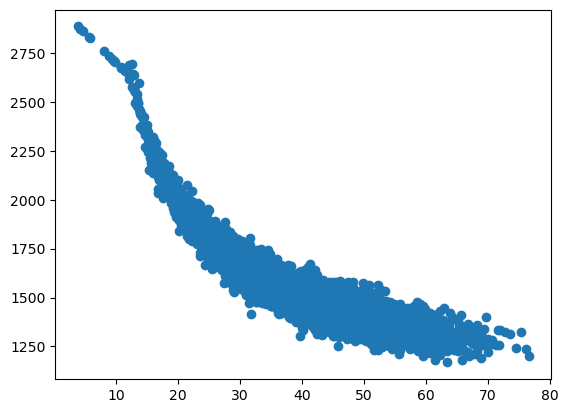

In [8]:
# plotting scatter plot between torque and rotational speed(to check relation between them)

plt.scatter(x='Torque [Nm]',y='Rotational speed [rpm]',data =df)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_62248\629300414.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

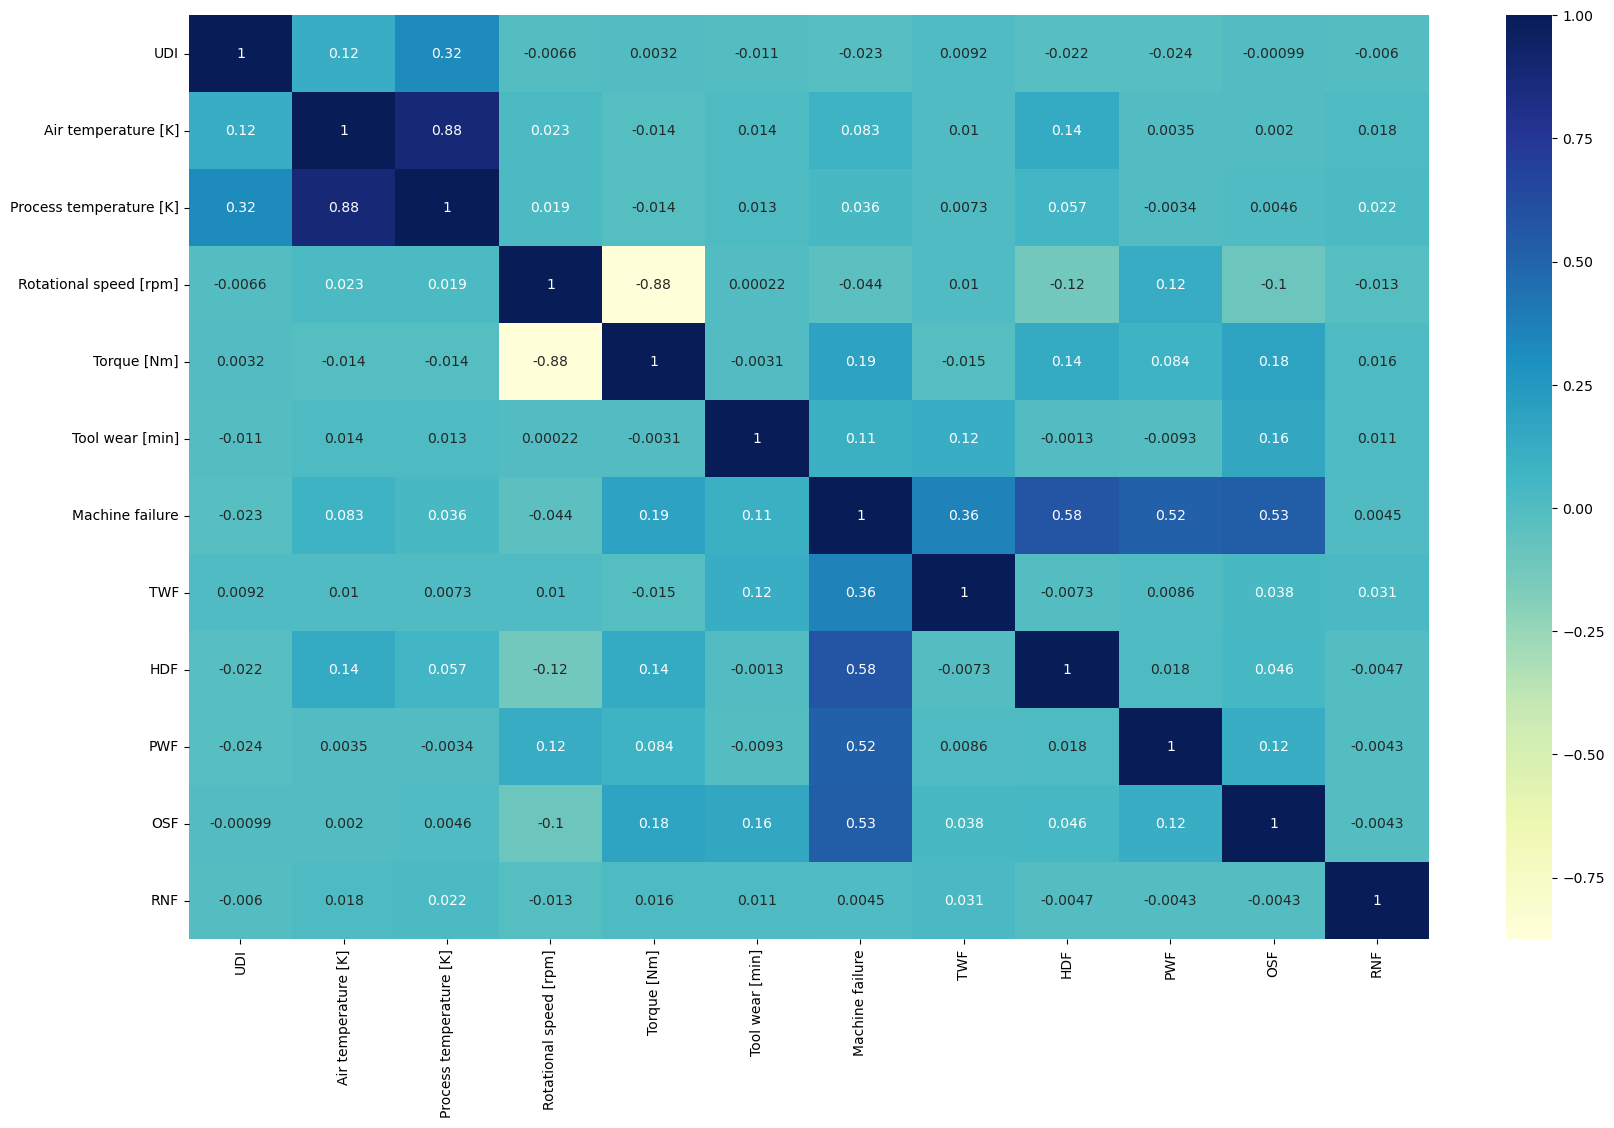

In [9]:
#Checking pearson correlation via heatmap for surity in selecting features selection

plt.figure(figsize=(20,12))
corr = df.corr()
sns.heatmap(corr,annot =True,cmap="YlGnBu")

    As heatmap shows correlation between torque and Rotational speed more than 85% but negative
    Process Temperature and Air temperature are correlated to each other by 88% positively
    we will consider all features in training model as they are not more than 95%.








# Analysis report

In [10]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [11]:
# Selecting data for dependent variable

y = df[['Air temperature [K]']]

In [12]:
y

,Air temperature [K]
0,298.1
1,298.2
2,298.1
3,298.2
4,298.2
...,...
9995,298.8
9996,298.9
9997,299.0
9998,299.0


In [13]:
# selecting independednt variabe for training model

x=df.iloc[:,4:]

In [14]:
x

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,308.4,1604,29.5,14,0,0,0,0,0,0
9996,308.4,1632,31.8,17,0,0,0,0,0,0
9997,308.6,1645,33.4,22,0,0,0,0,0,0
9998,308.7,1408,48.5,25,0,0,0,0,0,0


In [15]:
# Splitting train data and test data for model building

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [16]:
# importing linearregression from sklear library for building model

from sklearn.linear_model import LinearRegression
linear =  LinearRegression()

In [17]:
linear.fit(X_train,y_train)

LinearRegression()

In [18]:
# equation m value(y =mx +c)

linear.coef_

array([[ 1.16782088e+00,  2.84929385e-04,  3.31582151e-03,
         2.07050225e-04, -2.02450461e-01,  3.72633304e-01,
         1.89399935e+00,  1.46578488e-01, -1.53891259e-04,
         1.07832261e-01]])

In [19]:
# equation c value(y =mx +c)

linear.intercept_

array([-62.63363563])

In [20]:
# saving linear model

model = 'linear_pred_maint.sav'
pickle.dump(linear,open(model,'wb'))  

In [21]:
# calling saved model for prediction

saved_model =pickle.load(open(model,'rb'))

In [22]:
# Checking model acccuracy

saved_model.score(X_test,y_test)

0.766553684101524

In [23]:
# test case

saved_model.predict(X_test)

array([[300.34010116],
       [301.86480906],
       [297.52502208],
       ...,
       [300.88861022],
       [298.46072928],
       [297.89974914]])

In [24]:
x.columns

Index(['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [25]:
# importing standard scaler module for standard scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
arr = scaler.fit_transform(x)

In [27]:
arr.shape

(10000, 10)

In [28]:
X_train, X_test, y_train, y_test = train_test_split( arr,y , test_size=0.33, random_state=100)

In [29]:
lr =LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
lr.score(X_test,y_test)

0.7870893319680821

In [32]:
x.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0


In [33]:
# prediction without scaling features

lr.predict([[308.6,1551,42.8,0,0,0,0,0,0,0]])

array([[868.61786482]])

In [34]:
test = scaler.transform([[308.6,1551,42.8,0,0,0,0,0,0,0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
test.shape

(1, 10)

In [36]:
# prediction after scaling features

lr.predict(test)

array([[298.34251541]])

In [37]:
# checking Air temp value if correct predicted

df.iloc[:1,:]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0


In [38]:
# saving linear regression model in pickle format

pickle.dump(lr,open('lr_simple.pickle','wb'))

In [39]:


ls

 Volume in drive F is Mayank
 Volume Serial Number is 2ACE-6255

 Directory of F:\Data Science\Predictive Maintenance Project

03-07-2023  17:03    <DIR>          .
03-07-2023  17:03    <DIR>          ..
03-07-2023  17:37               791 linear_pred_maint.sav
03-07-2023  17:37               573 lr_simple.pickle
13-04-2022  04:28         4,337,975 Predictive maintenance Multi Linear Regrsssion Homework(Ineuron).ipynb
09-04-2022  10:21           522,048 predictive_maintenance.csv
               4 File(s)      4,861,387 bytes
               2 Dir(s)  166,685,667,328 bytes free


In [40]:
# importing linear model from saved file

lr_model = pickle.load(open('lr_simple.pickle','rb'))

In [41]:
lr_model.predict(test)

array([[298.34251541]])

In [42]:
# Adjusted r2 method

def adj_r2(x,y):
    n =x.shape[0]
    p= x.shape[1]
    r2 = lr.score(x,y)
    adj = 1-(1-r2)*(n-1)/(n-p-1)
    return adj

In [43]:
# calculation adjusted r2

adj_r2(X_test,y_test)

0.7864419903200677

# lasso Linear regrsssion model building

In [44]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

In [45]:
lasso_cv = LassoCV(cv=10, max_iter = 200000)
lasso_cv.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=10, max_iter=200000)

In [46]:
lasso_cv.alpha_

0.010554239248534936

In [47]:
lasso = Lasso(alpha =lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.010554239248534936)

In [48]:
lasso.predict(test)

array([298.35637233])

In [49]:
lasso.score(X_test,y_test)

0.786690207025668

# Ridge liner regrssion model building


In [50]:
sample = np.random.uniform(1,10,100)

ridge_cv = RidgeCV(alphas = sample,cv=10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([2.17112052, 5.38172207, 7.73853681, 8.61120661, 6.32944142,
       8.26484221, 1.14531261, 6.6786512 , 7.60994826, 7.5973162 ,
       3.24943891, 8.20106068, 4.09377007, 5.097064  , 3.64627907,
       3.61806886, 1.12846629, 8.59970685, 2.63369575, 9.80154725,
       5.1962466 , 7.58882761, 9.1684962 , 2.20228449, 5.15553712,
       9.92027497, 6.29066319, 6.25842543, 6.82836772, 4.20157088,
       9.39...
       1.91762082, 1.73617387, 2.49286147, 1.25908321, 8.46335383,
       8.67074132, 3.5378545 , 8.41273758, 1.16024329, 3.482399  ,
       4.01920014, 6.86076785, 5.80817686, 2.14654083, 7.46174349,
       2.17118121, 9.52984226, 6.59667444, 3.27265466, 6.32147239,
       3.10852042, 4.03544396, 3.9772282 , 8.43053515, 2.12778486,
       8.91942318, 4.15347563, 2.06400157, 3.41103865, 3.38809446,
       2.84735657, 5.95022681, 2.68948227, 7.26718697, 2.48523372]),
        cv=10)

In [51]:
ridge_cv.alpha_

9.260941304921358

In [52]:
ridge = Ridge(alpha =ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.260941304921358)

In [53]:
ridge.predict(test)

array([[298.34469107]])

In [54]:
ridge.score(X_test,y_test)

0.7870481836643004

# elasticnet Linear regrssion model  builiding

In [55]:
elasticnet_cv = ElasticNetCV(cv =10, max_iter = 200000)
elasticnet_cv.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(cv=10, max_iter=200000)

In [56]:
elasticnet_cv.alpha_

0.011264960096724771

In [57]:
elasticnet_cv.l1_ratio

0.5

In [58]:
elasticnet = ElasticNet(alpha=elasticnet_cv.alpha_,l1_ratio= elasticnet_cv.l1_ratio)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.011264960096724771)

In [59]:
elasticnet.predict(test)

array([298.36102809])

In [60]:
test2 = scaler.transform([[313.7,1670,32.9,0,0,0,0,0,0,0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
elasticnet.predict(test2)

array([304.26095393])

In [62]:
elasticnet.score(X_test,y_test)

0.7866975334301157

# Accuracy of model is 78.7 % and model is stable as in all lasso, ridge and elasticnet same accuracy is showing